# Homework 6 of Machine Learning

## PPG-DaLiA reference:

- https://archive.ics.uci.edu/ml/datasets/PPG-DaLiA
- https://archive.ics.uci.edu/ml/machine-learning-databases/00495/readme.pdf

## Scikit-learn reference:

- https://scikit-learn.org/stable/index.html

## PyTorch reference:

- https://pytorch.org/docs/stable/index.html

In [1]:
# read the csv file with pandas

import pandas as pd

train_df = pd.read_csv("data/train_data.csv")
test_df = pd.read_csv("data/test_data.csv")

print(train_df.shape)
print(test_df.shape)

(466160, 19)
(51796, 18)


## 1    [10pts] Dataset Analysis and Preprocessing

In [2]:
# 1.1 [2pts] Output the features in training and test data and find the difference

# Fill in None in the following code.
print("Training data:")
train_features = train_df.columns

# print(train_features)
# print(train_df[0])
for fea in train_features:
    print(f"Feature: {fea}, Type: {train_df[fea].dtype}")

print("\nTest data:")
test_features = test_df.columns
for fea in test_features:
    print(f"Feature: {fea}, Type: {test_df[fea].dtype}")
    
difference = set(train_features) - set(test_features)
print(f"\nDifference between train_features and test_features: {difference}")

Training data:
Feature: chest_acc_x, Type: float64
Feature: chest_acc_y, Type: float64
Feature: chest_acc_z, Type: float64
Feature: chest_resp, Type: float64
Feature: chest_ecg, Type: float64
Feature: wrist_acc_x, Type: float64
Feature: wrist_acc_y, Type: float64
Feature: wrist_acc_z, Type: float64
Feature: wrist_bvp, Type: float64
Feature: wrist_temp, Type: float64
Feature: weight, Type: float64
Feature: gender, Type: object
Feature: age, Type: int64
Feature: height, Type: float64
Feature: skin, Type: int64
Feature: sport, Type: int64
Feature: rpeaks, Type: int64
Feature: activity, Type: int64
Feature: heart_rate, Type: float64

Test data:
Feature: chest_acc_x, Type: float64
Feature: chest_acc_y, Type: float64
Feature: chest_acc_z, Type: float64
Feature: chest_resp, Type: float64
Feature: chest_ecg, Type: float64
Feature: wrist_acc_x, Type: float64
Feature: wrist_acc_y, Type: float64
Feature: wrist_acc_z, Type: float64
Feature: wrist_bvp, Type: float64
Feature: wrist_temp, Type: float

In [3]:
# 1.2 [2pts] Feature analysis

# Fill in None in the following code.

def feature_analysis(df, features):
    for fea in features:
        fea_name = fea.ljust(11, " ")
        if df[fea].dtype != object:
            print(
                f"Feature: {fea_name},\t Type: {df[fea].dtype},\t",
                f"Min: {round(df[fea].min(), 3)},\t Max: {round(df[fea].max(), 3)},\t",
                f"Mean: {round(df[fea].mean(), 3)},\t Std: {round(df[fea].std(), 3)},\t",
                f"unique_num: {df[fea].nunique()}, \t null_num: {df[fea].isnull().sum()}"
            )
        else:
            print(
                "-"*100,
                f"\nFeature: {fea_name},\t Type: {df[fea].dtype},\t",
                f"unique_num: {df[fea].nunique()},\t null_num: {df[fea].isnull().sum()}"
            )
            unique_value_list = df[fea].unique()
            for value in unique_value_list:
                print(f"value: {value},\t num: {(df[fea] == value).sum()}")
            print("-"*100)

print("Training data:")
feature_analysis(train_df, train_features)

print(f"\n{'='*130}\n")
print("Test data:")
feature_analysis(test_df, test_features)

Training data:
Feature: chest_acc_x,	 Type: float64,	 Min: -0.67,	 Max: 3.737,	 Mean: 0.864,	 Std: 0.175,	 unique_num: 466160, 	 null_num: 0
Feature: chest_acc_y,	 Type: float64,	 Min: -1.15,	 Max: 0.944,	 Mean: -0.007,	 Std: 0.118,	 unique_num: 466160, 	 null_num: 0
Feature: chest_acc_z,	 Type: float64,	 Min: -4.021,	 Max: 4.642,	 Mean: -0.102,	 Std: 0.303,	 unique_num: 466160, 	 null_num: 0
Feature: chest_resp ,	 Type: float64,	 Min: -49.98,	 Max: 49.974,	 Mean: 0.046,	 Std: 4.422,	 unique_num: 466160, 	 null_num: 0
Feature: chest_ecg  ,	 Type: float64,	 Min: -1.5,	 Max: 1.5,	 Mean: 0.001,	 Std: 0.313,	 unique_num: 466160, 	 null_num: 0
Feature: wrist_acc_x,	 Type: float64,	 Min: -2.0,	 Max: 1.984,	 Mean: -0.523,	 Std: 0.351,	 unique_num: 466160, 	 null_num: 0
Feature: wrist_acc_y,	 Type: float64,	 Min: -2.0,	 Max: 1.984,	 Mean: 0.1,	 Std: 0.645,	 unique_num: 466160, 	 null_num: 0
Feature: wrist_acc_z,	 Type: float64,	 Min: -2.0,	 Max: 1.984,	 Mean: 0.356,	 Std: 0.405,	 unique_num: 4

In [4]:
# 1.3 [2pts] Feature encoder

# Hint: use sklearn.preprocessing.LabelEncoder
from sklearn.preprocessing import LabelEncoder

for fea in train_features:
    if train_df[fea].dtype == object:
        encoder = LabelEncoder()
        train_df[fea] = encoder.fit_transform(train_df[fea])
        test_df[fea] = encoder.transform(test_df[fea])
        
# print("Training data:")
# feature_analysis(train_df, train_features)
# print("Test data:")
# feature_analysis(test_df, test_features)
print(train_df["gender"])
print(test_df["gender"])

0         1
1         1
2         0
3         1
4         1
         ..
466155    0
466156    0
466157    0
466158    0
466159    1
Name: gender, Length: 466160, dtype: int32
0        1
1        1
2        0
3        0
4        0
        ..
51791    1
51792    1
51793    0
51794    0
51795    1
Name: gender, Length: 51796, dtype: int32


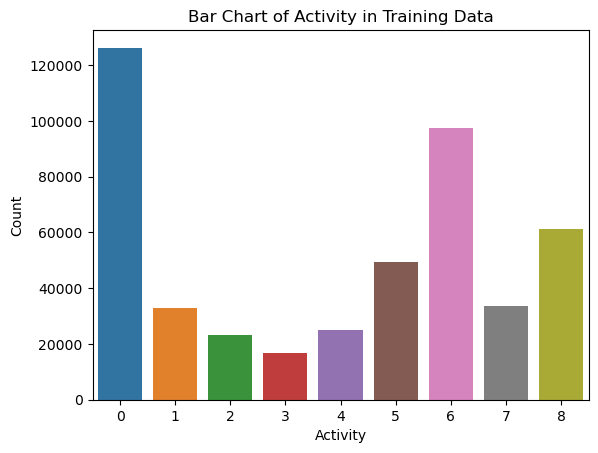

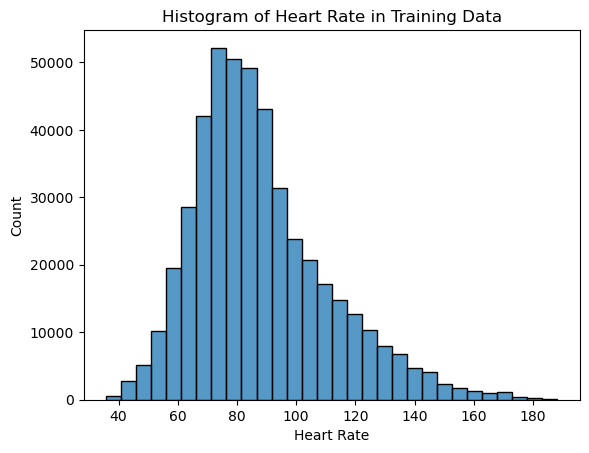

In [5]:
# 1.4 [2pts] Feature distribution

import seaborn as sns
import matplotlib.pyplot as plt

# Bar chart for activity in training data
# plt.bar() # TODO
sns.countplot(x='activity', data=train_df)
plt.xlabel('Activity')
plt.ylabel('Count')
plt.title('Bar Chart of Activity in Training Data')
plt.show()

# Histogram for heart_rate in training data
sns.histplot(train_df['heart_rate'], bins=30) # TODO
plt.xlabel('Heart Rate')
plt.ylabel('Count')
plt.title('Histogram of Heart Rate in Training Data')
plt.show()

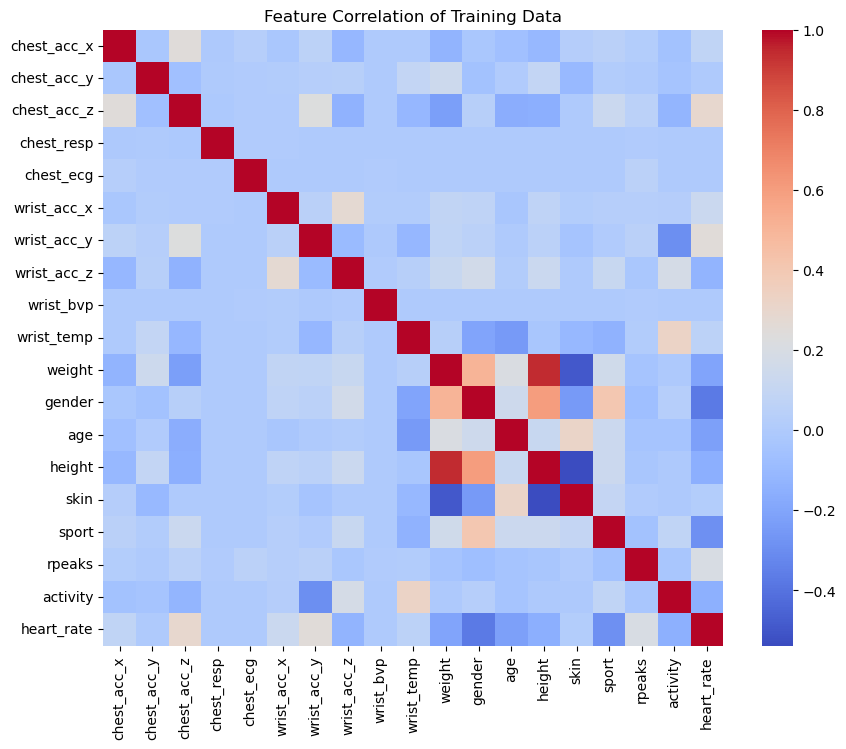

In [6]:
# 1.5 [2pts] Heatmap of feature correlation

correlation_matrix = train_df.corr(method="pearson")
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm') # TODO
plt.title('Feature Correlation of Training Data')
plt.show()

## 2    [15pts] K-Fold Cross Validation

In [7]:
import math
import numpy as np
from sklearn.preprocessing import normalize
from sklearn.metrics import roc_curve, auc, roc_auc_score, accuracy_score
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

X_train = train_df.values[:, :-2].astype(np.float64)
y_train = train_df.values[:, -2].astype(np.int32) #  "activity"

X_test = test_df.values[:, :-1].astype(np.float64)
y_test = test_df.values[:, -1].astype(np.int32)

X_train = normalize(X_train, axis=0, norm="max")
X_test = normalize(X_test, axis=0, norm="max") 

In [7]:
## Using sklearn, we can implement Logistic Regression easily 
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression(C=1.0, max_iter=500)

lr_model.fit(X_train, y_train) 
# predicted probability on test set using logistic regression model
y_pred_train_lr = lr_model.predict(X_train)
y_prob_lr = lr_model.predict_proba(X_test)
y_pred_test_lr = lr_model.predict(X_test)
print("Logistic Regression:\t acc on train is %.4f ; acc on test is %.4f ; AUC on test is %.4f" 
        %(accuracy_score(y_train, y_pred_train_lr), accuracy_score(y_test, y_pred_test_lr), roc_auc_score(y_test, y_prob_lr, multi_class='ovr'))) 

## However, we do not consider the hyperparameter C

Logistic Regression:	 acc on train is 0.5152 ; acc on test is 0.4281 ; AUC on test is 0.8149


In [10]:
# 2.1 [6pts] K-fold Cross Validation using accuracy
## Choosing the hyper parameter C

num_folds = 5
C_choices = [0.1, 1, 10, 100, 1000]

X_train_folds = []
y_train_folds = []
################################################################################
# TODO:                                                                        #
# Split up the training data into folds. After splitting, X_train_folds and    #
# y_train_folds should each be lists of length num_folds, where                #
# y_train_folds[i] is the label vector for the points in X_train_folds[i].     #
# Hint: Look up the numpy array_split function.                                #
################################################################################
# *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****

X_train_folds = np.array_split(X_train, num_folds)
y_train_folds = np.array_split(y_train, num_folds)

# *****END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****

# A dictionary holding the accuracies for different values of C that we find
# when running cross-validation. After running cross-validation,
# C_to_accuracies[C] should be a list of length num_folds giving the different
# accuracy values that we found when using that value of C.
C_to_accuracies = dict()


################################################################################
# TODO:                                                                        #
# Perform k-fold cross validation to find the best value of C. For each        #
# possible value of C, run the LogisticRegression algorithm num_folds times,   #
# where in each case you use all but one of the folds as training data and the #
# last fold as a validation set. Store the accuracies for all fold and all     #
# values of C in the C_to_accuracies dictionary.                               #
################################################################################
# *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****

for C in C_choices:
    accuracies = []
    for i in range(num_folds):
        # 划分训练集和验证集
        X_train_cv = np.concatenate(X_train_folds[:i] + X_train_folds[i+1:])
        y_train_cv = np.concatenate(y_train_folds[:i] + y_train_folds[i+1:])
        X_val_cv = X_train_folds[i]
        y_val_cv = y_train_folds[i]

        # 训练模型
        model = LogisticRegression(C=C)
        model.fit(X_train_cv, y_train_cv)

        # 计算验证集精度
        accuracy = model.score(X_val_cv, y_val_cv)
        accuracies.append(accuracy)
    
    # 保存精度
    C_to_accuracies[C] = accuracies
    
# *****END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****

# Print out the computed accuracies
for C in sorted(C_to_accuracies):
    for accuracy in C_to_accuracies[C]:
        print('C = %.2f, accuracy = %f' % (C, accuracy))

C = 0.10, accuracy = 0.501351
C = 0.10, accuracy = 0.499464
C = 0.10, accuracy = 0.497490
C = 0.10, accuracy = 0.502263
C = 0.10, accuracy = 0.499560
C = 1.00, accuracy = 0.503304
C = 1.00, accuracy = 0.500590
C = 1.00, accuracy = 0.501351
C = 1.00, accuracy = 0.503121
C = 1.00, accuracy = 0.499914
C = 10.00, accuracy = 0.505320
C = 10.00, accuracy = 0.500161
C = 10.00, accuracy = 0.501577
C = 10.00, accuracy = 0.503025
C = 10.00, accuracy = 0.498831
C = 100.00, accuracy = 0.503046
C = 100.00, accuracy = 0.501716
C = 100.00, accuracy = 0.499979
C = 100.00, accuracy = 0.505245
C = 100.00, accuracy = 0.500804
C = 1000.00, accuracy = 0.503046
C = 1000.00, accuracy = 0.500794
C = 1000.00, accuracy = 0.499635
C = 1000.00, accuracy = 0.503776
C = 1000.00, accuracy = 0.502574


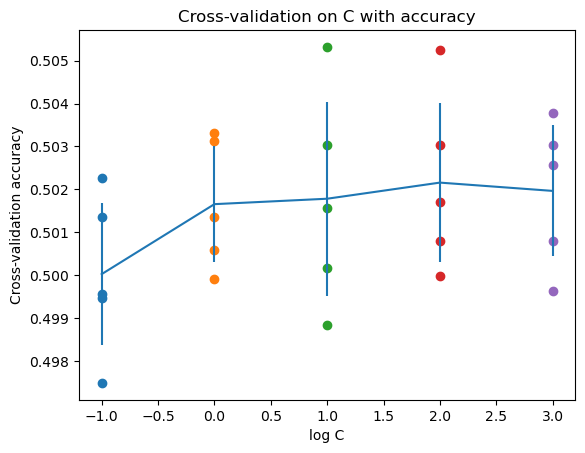

In [11]:
# 2.2 [2pts] Plot the result of 2.1

# plot the raw observations
for idx, C in enumerate(C_choices, 1):
    accuracies = C_to_accuracies[C]
    plt.scatter([math.log10(C)] * len(accuracies), accuracies)

# plot the trend line with error bars that correspond to standard deviation
accuracies_mean = np.array([np.mean(v) for _,v in sorted(C_to_accuracies.items())])
accuracies_std = np.array([np.std(v) for _,v in sorted(C_to_accuracies.items())])
plt.errorbar([math.log10(i) for i in C_choices], accuracies_mean, yerr=accuracies_std)
plt.title('Cross-validation on C with accuracy')
plt.xlabel('log C')
plt.ylabel('Cross-validation accuracy')
plt.show()

- Based on the result, which C value will you choose?[Put your answer here] 
C=10

In [28]:
 # 2.3 [5pts] K-fold Cross Validation using AUC

num_folds = 5
C_choices = [0.1, 1, 10, 100, 1000]

X_train_folds = []
y_train_folds = []
################################################################################
# TODO:                                                                        #
# Split up the training data into folds. After splitting, X_train_folds and    #
# y_train_folds should each be lists of length num_folds, where                #
# y_train_folds[i] is the label vector for the points in X_train_folds[i].     #
# Hint: Look up the numpy array_split function.                                #
################################################################################
# *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****

X_train_folds = np.array_split(X_train, num_folds)
y_train_folds = np.array_split(y_train, num_folds)

# *****END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****

# A dictionary holding the accuracies for different values of C that we find
# when running cross-validation. After running cross-validation,
# C_to_AUC[C] should be a list of length num_folds giving the different
# accuracy values that we found when using that value of C.
C_to_AUC = dict()


################################################################################
# TODO:                                                                        #
# Perform k-fold cross validation to find the best value of C. For each        #
# possible value of C, run the LogisticRegression algorithm num_folds times,   #
# where in each case you use all but one of the folds as training data and the #
# last fold as a validation set. Store the accuracies for all fold and all     #
# values of C in the C_to_AUC dictionary.                                      #
################################################################################
# *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****

for C in C_choices:
    AUCs = []
    for i in range(num_folds):
        # 划分训练姐和验证集
        X_train_cv = np.concatenate(X_train_folds[:i] + X_train_folds[i+1:])
        y_train_cv = np.concatenate(y_train_folds[:i] + y_train_folds[i+1:])
        X_val_cv = X_train_folds[i]
        y_val_cv = y_train_folds[i]

        # 训练模型
        model = LogisticRegression(C=C)
        model.fit(X_train_cv, y_train_cv)

        # Get the predicted probabilities for the positive class
        y_pred_prob = model.predict_proba(X_val_cv)#[:, 1]

        # 计算AUC
        auc1 = roc_auc_score(y_val_cv, y_pred_prob, multi_class='ovr')
        AUCs.append(auc1)
    
    # 保存结果
    C_to_AUC[C] = AUCs
    
# *****END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****

# Print out the computed AUCs
for C in sorted(C_to_AUC):
    for accuracy in C_to_AUC[C]:
        print('C = %.2f, auc = %f' % (C, auc1))

C = 0.10, auc = 0.865295
C = 0.10, auc = 0.865295
C = 0.10, auc = 0.865295
C = 0.10, auc = 0.865295
C = 0.10, auc = 0.865295
C = 1.00, auc = 0.865295
C = 1.00, auc = 0.865295
C = 1.00, auc = 0.865295
C = 1.00, auc = 0.865295
C = 1.00, auc = 0.865295
C = 10.00, auc = 0.865295
C = 10.00, auc = 0.865295
C = 10.00, auc = 0.865295
C = 10.00, auc = 0.865295
C = 10.00, auc = 0.865295
C = 100.00, auc = 0.865295
C = 100.00, auc = 0.865295
C = 100.00, auc = 0.865295
C = 100.00, auc = 0.865295
C = 100.00, auc = 0.865295
C = 1000.00, auc = 0.865295
C = 1000.00, auc = 0.865295
C = 1000.00, auc = 0.865295
C = 1000.00, auc = 0.865295
C = 1000.00, auc = 0.865295


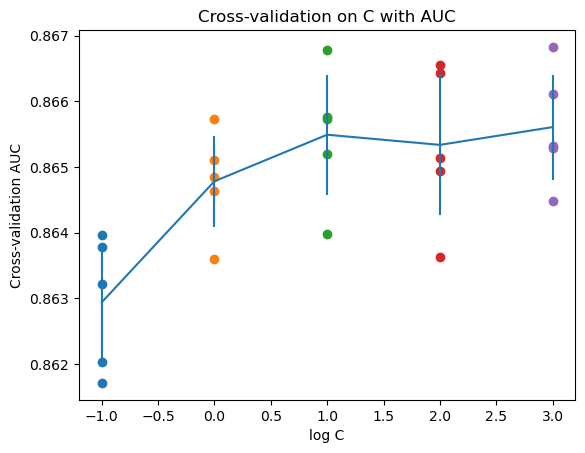

In [13]:
# 2.4 [2pts] Plot the result of 2.3

# plot the raw observations
for idx, C in enumerate(C_choices, 1):
    accuracies = C_to_AUC[C]
    plt.scatter([math.log10(C)] * len(accuracies), accuracies)

# plot the trend line with error bars that correspond to standard deviation
AUCs_mean = np.array([np.mean(v) for _,v in sorted(C_to_AUC.items())])
AUCs_std = np.array([np.std(v) for _,v in sorted(C_to_AUC.items())])
plt.errorbar([math.log10(i) for i in C_choices], AUCs_mean, yerr=AUCs_std)
plt.title('Cross-validation on C with AUC')
plt.xlabel('log C')
plt.ylabel('Cross-validation AUC')
plt.show()

- According to the result, which C value will you choose?
[Put your answer here] C=10

## 3 [15pts] Various Classification Models

In [8]:
# Using C=10, we can get a better LogisticRegression model
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression(C=10, max_iter=500)
lr_model.fit(X_train, y_train) 
y_pred_train_lr = lr_model.predict(X_train)
y_pred_test_lr = lr_model.predict(X_test) 
y_prob_lr = lr_model.predict_proba(X_test)
print("Logistic Regression:\t acc on train is %.4f ; acc on test is %.4f ; AUC on test is %.4f" 
        %(accuracy_score(y_train, y_pred_train_lr), accuracy_score(y_test, y_pred_test_lr), roc_auc_score(y_test, y_prob_lr, multi_class='ovr'))) 

Logistic Regression:	 acc on train is 0.5166 ; acc on test is 0.4264 ; AUC on test is 0.8122


In [9]:
# 3.1 [2pts] Tree model
from sklearn.tree import DecisionTreeClassifier

tree_model = DecisionTreeClassifier(max_depth=20)
tree_model.fit(X_train, y_train)

y_pred_train_tree = tree_model.predict(X_train)
y_pred_test_tree = tree_model.predict(X_test)
y_prob_tree = tree_model.predict_proba(X_test)

print("Decision Tree:\t acc on train is %.4f ; acc on test is %.4f ; AUC on test is %.4f" 
        %(accuracy_score(y_train, y_pred_train_tree), accuracy_score(y_test, y_pred_test_tree), roc_auc_score(y_test, y_prob_tree, multi_class='ovr'))) 

Decision Tree:	 acc on train is 0.9715 ; acc on test is 0.5216 ; AUC on test is 0.7455


In [10]:
# 3.2 [2pts] Multi- Layer Perceptron
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.metrics import accuracy_score, roc_auc_score

# 定义MLP类
class MLP(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, output_size)
        
    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        return out

# 把数据转成tensor类型
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.long)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.long)

input_size = X_train_tensor.shape[1]
hidden_size = 128
output_size = len(torch.unique(y_train_tensor))

MLP_model = MLP(input_size, hidden_size, output_size)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(MLP_model.parameters(), lr=0.001)
num_epochs = 100

for epoch in range(num_epochs):
    MLP_model.train()
    outputs = MLP_model(X_train_tensor)
    loss = criterion(outputs, y_train_tensor)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

MLP_model.eval()

y_pred_train_mlp = MLP_model(X_train_tensor).argmax(dim=1).detach().numpy()
y_pred_test_mlp = MLP_model(X_test_tensor).argmax(dim=1).detach().numpy()
y_prob_mlp = torch.nn.functional.softmax(MLP_model(X_test_tensor), dim=1).detach().numpy()

print("MLP:\t acc on train is %.4f ; acc on test is %.4f ; AUC on test is %.4f" 
        %(accuracy_score(y_train, y_pred_train_mlp), accuracy_score(y_test, y_pred_test_mlp), roc_auc_score(y_test, y_prob_mlp, multi_class='ovr'))) 

MLP:	 acc on train is 0.7982 ; acc on test is 0.5301 ; AUC on test is 0.9055


In [11]:
# 3.3 [2pts] Support Vector Machine
from sklearn.svm import SVC

svm_model = SVC(probability=True, max_iter=50)

svm_model.fit(X_train, y_train)

y_pred_train_svm = svm_model.predict(X_train)
y_pred_test_svm = svm_model.predict(X_test)
y_prob_svm = svm_model.predict_proba(X_test)

print("SVM:\t acc on train is %.4f ; acc on test is %.4f ; AUC on test is %.4f" 
        %(accuracy_score(y_train, y_pred_train_svm), accuracy_score(y_test, y_pred_test_svm), roc_auc_score(y_test, y_prob_svm, multi_class='ovr'))) 

SVM:	 acc on train is 0.2577 ; acc on test is 0.2717 ; AUC on test is 0.6622


In [12]:
# 3.4 [2pts] Naive Bayes
from sklearn.naive_bayes import GaussianNB

bayesian_model = GaussianNB()
bayesian_model.fit(X_train, y_train)

y_pred_train_nb = bayesian_model.predict(X_train)
y_pred_test_nb = bayesian_model.predict(X_test)
y_prob_nb = bayesian_model.predict_proba(X_test)

print("Naive Bayes:\t acc on train is %.4f ; acc on test is %.4f ; AUC on test is %.4f" 
        %(accuracy_score(y_train, y_pred_train_nb), accuracy_score(y_test, y_pred_test_nb), roc_auc_score(y_test, y_prob_nb, multi_class='ovr'))) 

Naive Bayes:	 acc on train is 0.5096 ; acc on test is 0.2920 ; AUC on test is 0.7894


In [13]:
# 3.5 [2pts] Random Forest
from sklearn.ensemble import RandomForestClassifier

params = {
    'n_estimators': 100,  # Number of trees
    # Add other parameters as needed
}
rf_model = RandomForestClassifier(**params)
rf_model.fit(X_train, y_train)

y_pred_train_rf = rf_model.predict(X_train)
y_pred_test_rf = rf_model.predict(X_test)
y_prob_rf = rf_model.predict_proba(X_test)

print("Random Forest:\t acc on train is %.4f ; acc on test is %.4f ; AUC on test is %.4f" 
        %(accuracy_score(y_train, y_pred_train_rf), accuracy_score(y_test, y_pred_test_rf), roc_auc_score(y_test, y_prob_rf, multi_class='ovr'))) 

Random Forest:	 acc on train is 1.0000 ; acc on test is 0.6510 ; AUC on test is 0.9746


In [14]:
# 3.6 [2pts] LightGBM
from lightgbm import LGBMClassifier


LightGBM_model = LGBMClassifier()
LightGBM_model.fit(X_train, y_train)

y_pred_train_gbm = LightGBM_model.predict(X_train)
y_pred_test_gbm = LightGBM_model.predict(X_test)
y_prob_gbm = LightGBM_model.predict_proba(X_test)

print("LightGBM:\t acc on train is %.4f ; acc on test is %.4f ; AUC on test is %.4f" 
        %(accuracy_score(y_train, y_pred_train_gbm), accuracy_score(y_test, y_pred_test_gbm), roc_auc_score(y_test, y_prob_gbm, multi_class='ovr'))) 

LightGBM:	 acc on train is 0.9185 ; acc on test is 0.5923 ; AUC on test is 0.9622


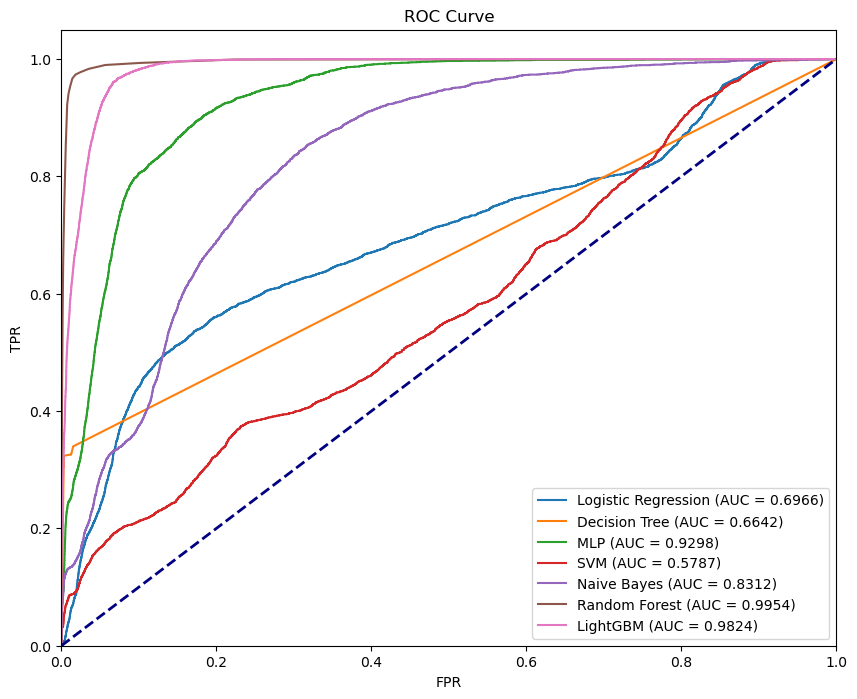

In [17]:
# 3.7 [3pts] Plot ROCs in one image

################################################################################
# TODO:                                                                        #
# Plot the ROC on test set using ovr for all models above                      #
################################################################################
# *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****

import matplotlib.pyplot as plt

models = [
    ["Logistic Regression", y_prob_lr],
    ["Decision Tree", y_prob_tree],
    ["MLP", y_prob_mlp],
    ["SVM", y_prob_svm],
    ["Naive Bayes", y_prob_nb],
    ["Random Forest", y_prob_rf],
    ["LightGBM", y_prob_gbm]
]

plt.figure(figsize=(10, 8))

for name, y_prod in models:
    fpr, tpr, _ = roc_curve(y_test, y_prod[:, 1], pos_label=1)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label="%s (AUC = %0.4f)" % (name, roc_auc))

plt.plot([0, 1], [0, 1], color="navy", lw=2, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.show()



plt.show()

# *****END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****

- From the result, which model performs well?
[Put your answer here]  Random Forest
- And which model performs poor?
[Put your answer here] SVM

## 4 [15pts] Model Combination Strategies

In [16]:
# 4.1 [5pts] Voting
import numpy as np

# 预测结果，二维矩阵，每i行代表七个基学习器对x_i的预测
y_pred_train = np.array(list(zip((y_pred_train_lr, y_pred_train_tree, y_pred_train_mlp, y_pred_train_svm, y_pred_train_nb, y_pred_train_rf, y_pred_train_gbm))))
y_pred_test = np.array(list(zip((y_pred_test_lr, y_pred_test_tree, y_pred_test_mlp, y_pred_test_svm, y_pred_test_nb, y_pred_test_rf, y_pred_test_gbm))))
y_pred_train = np.transpose(y_pred_train)
y_pred_test = np.transpose(y_pred_test)

# 相对多数投票预测
y_pred_train_voting = np.zeros(len(X_train))
y_pred_test_voting = np.zeros(len(X_test))
for i in range(len(y_pred_train)):
    y_pred_train_voting[i] = np.argmax(np.bincount(y_pred_train[i].flatten()))
for i in range(len(y_pred_test_voting)):
    y_pred_test_voting[i] = np.argmax(np.bincount(y_pred_test[i].flatten()))

print("Voting strategy:\t acc on train is %.4f ; acc on test is %.4f" 
        %(accuracy_score(y_train, y_pred_train_voting), accuracy_score(y_test, y_pred_test_voting))) 

Voting strategy:	 acc on train is 0.9117 ; acc on test is 0.5796


In [52]:
 # 2.3 [5pts] K-fold Cross Validation using AUC
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from lightgbm import LGBMClassifier

X_train_stack = np.squeeze(np.array(list(zip((y_pred_train_mlp, y_pred_train_svm, y_pred_train_gbm)))))
X_test_stack = np.squeeze(np.array(list(zip((y_pred_test_mlp, y_pred_test_svm,y_pred_test_gbm)))))
X_train_stack = np.transpose(X_train_stack)
X_test_stack = np.transpose(X_test_stack)

num_folds = 5

X_train_folds = []
y_train_folds = []

X_train_folds = np.array_split(X_train, num_folds)
y_train_folds = np.array_split(y_train, num_folds)

X_train_stack1 = [[], [], [], [], []]
y_train_stack1 = [[], [], [], [], []]

for i in range(num_folds):
    # 划分训练姐和验证集
    X_train_cv = np.concatenate(X_train_folds[:i] + X_train_folds[i+1:])
    y_train_cv = np.concatenate(y_train_folds[:i] + y_train_folds[i+1:])
    X_val_cv = X_train_folds[i]
    y_val_cv = y_train_folds[i]

    # 训练模型
    model1 = MLPClassifier(max_iter=30)
    model1.fit(X_train_cv, y_train_cv)

    model2 = SVC(probability=True, max_iter=20)
    model2.fit(X_train_cv, y_train_cv)

    model3 = LGBMClassifier()
    model3.fit(X_train_cv, y_train_cv)

    y_pred1 = model1.predict(X_val_cv)#[:, 1]
    y_pred2 = model2.predict(X_val_cv)
    y_pred3 = model3.predict(X_val_cv)
    y_pred = np.array(list(zip(y_pred1, y_pred2, y_pred3)))
    
    X_train_stack1[i] = y_pred
    y_train_stack1[i] = y_val_cv

X_train_stack2 = np.concatenate((X_train_stack1[0], X_train_stack1[1], X_train_stack1[2], X_train_stack1[3], X_train_stack1[4]))
y_train_stack2 = np.concatenate((y_train_stack1[0], y_train_stack1[1], y_train_stack1[2], y_train_stack1[3], y_train_stack1[4]))

lr = LogisticRegression()
lr.fit(X_train_stack2, y_train_stack2)

y_pred_train_stacking = lr.predict(X_train_stack)
y_pred_test_stacking = lr.predict(X_test_stack)

y_test = test_df.values[:, -1].astype(np.int32)
print("Stacking strategy:\t acc on train is %.4f ; acc on test is %.4f" 
        %(accuracy_score(y_train, y_pred_train_stacking), accuracy_score(y_test, y_pred_test_stacking)))


Stacking strategy:	 acc on train is 0.6008 ; acc on test is 0.3909


## 5 [45pts] Regression Task in Practice

Write your code below.

In [8]:
from sklearn.ensemble import RandomForestRegressor

X_train_reg = train_df.values[:, :-1].astype(np.float64)
y_train_reg = train_df.values[:, -1].astype(np.float64) #  "heart_rate"

X_test_reg = test_df.values[:, :].astype(np.float64)
# X_train_reg = normalize(X_train_reg, axis=0, norm="max")
# X_test_reg = normalize(X_test_reg, axis=0, norm="max") 
# y_train_reg = normalize(y_train_reg, axis=0, norm="max") 

rf_regressor = RandomForestRegressor(n_estimators=300)
rf_regressor.fit(X_train_reg, y_train_reg)

# 预测结果
y_test = rf_regressor.predict(X_test_reg)
y_test_df = pd.DataFrame({'id': range(0, len(y_test) ), 'expected': y_test})

# 将预测结果保存为CSV文件
y_test_df.to_csv('rf_predicitions.csv', index=False)

In [ ]:
from sklearn.ensemble import AdaBoostRegressor

X_train_reg = train_df.values[:, :-1].astype(np.float64)
y_train_reg = train_df.values[:, -1].astype(np.float64) #  "heart_rate"

X_test_reg = test_df.values[:, :].astype(np.float64)

# X_train_reg = normalize(X_train_reg, axis=0, norm="max")
# X_test_reg = normalize(X_test_reg, axis=0, norm="max") 
# y_train_reg = normalize(y_train_reg, axis=0, norm="max") 

adaboost_regressor = AdaBoostRegressor(n_estimators=100)
adaboost_regressor.fit(X_train_reg, y_train_reg)

# 预测结果
y_test = adaboost_regressor.predict(X_test_reg)
y_test_df = pd.DataFrame({'id': range(0, len(y_test) ), 'expected': y_test})

# 将预测结果保存为CSV文件
y_test_df.to_csv('adaboost_predicitions.csv', index=False)